In [2]:
import pandas as pd
import sqlite3
import os

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [4]:
# creating database connection
conn = sqlite3.connect('restaurant.db')

In [5]:
# checking tables present in database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE TYPE='table'",conn)
print(tables)

          name
0    customers
1  geolocation
2       orders
3  order_items
4     payments
5     products
6      sellers


In [6]:
customers = pd.read_sql("SELECT * FROM customers", conn)


In [7]:
geolocation = pd.read_sql("SELECT * FROM geolocation", conn)
orders = pd.read_sql("SELECT * FROM orders", conn)
order_items = pd.read_sql("SELECT * FROM order_items", conn)
payments= pd.read_sql("SELECT * FROM payments", conn)
products = pd.read_sql("SELECT * FROM  products", conn)
sellers = pd.read_sql("SELECT * FROM  sellers", conn)

In [8]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [9]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


List all unique cities where customers are located?

In [10]:
query = pd.read_sql("SELECT DISTINCT(customer_city) FROM customers", conn)
print(query)


              customer_city
0                    franca
1     sao bernardo do campo
2                 sao paulo
3           mogi das cruzes
4                  campinas
...                     ...
4114                 siriji
4115    natividade da serra
4116           monte bonito
4117             sao rafael
4118      eugenio de castro

[4119 rows x 1 columns]


Count the number of orders placed in 2017?

In [11]:
query = pd.read_sql("SELECT order_id FROM orders WHERE order_purchase_timestamp LIKE '2017%'", conn)
print("Number of orders placed in 2017:", query)

Number of orders placed in 2017:                                order_id
0      e481f51cbdc54678b7cc49136f2d6af7
1      949d5b44dbf5de918fe9c16f97b45f8a
2      a4591c265e18cb1dcee52889e2d8acc3
3      136cce7faa42fdb2cefd53fdc79a6098
4      6514b8ad8028c9f2cc2374ded245783f
...                                 ...
45096  9115830be804184b91f5c00f6f49f92d
45097  aa04ef5214580b06b10e2a378300db44
45098  880675dff2150932f1601e1c07eadeeb
45099  9c5dedf39a927c1b2549525ed64a053c
45100  83c1379a015df1e13d02aae0204711ab

[45101 rows x 1 columns]


Find the total Sales per category?

In [12]:
pd.read_sql("PRAGMA table_info(products)", conn)


,cid,name,type,notnull,dflt_value,pk
0,0,product_id,TEXT,0,None,0
1,1,product category,TEXT,0,None,0
2,2,product_name_length,FLOAT,0,None,0
3,3,product_description_length,FLOAT,0,None,0
4,4,product_photos_qty,FLOAT,0,None,0
5,5,product_weight_g,FLOAT,0,None,0
6,6,product_length_cm,FLOAT,0,None,0
7,7,product_height_cm,FLOAT,0,None,0
8,8,product_width_cm,FLOAT,0,None,0


In [13]:
query = pd.read_sql("""
    SELECT upper(products."product category") AS category, 
           sum(payments.payment_value) AS sales
    FROM products
    JOIN order_items ON products.product_id = order_items.product_id
    JOIN payments ON order_items.order_id = payments.order_id
    GROUP BY category
    ORDER BY sales DESC
""", conn)


In [14]:
print(query)

                       category       sales
0                BED TABLE BATH  1712553.67
1                 HEALTH BEAUTY  1657373.12
2          COMPUTER ACCESSORIES  1585330.45
3          FURNITURE DECORATION  1430176.39
4               WATCHES PRESENT  1429216.68
..                          ...         ...
69                     PC GAMER     2174.43
70              HOUSE COMFORT 2     1710.54
71               CDS MUSIC DVDS     1199.43
72  FASHION CHILDREN'S CLOTHING      785.67
73       INSURANCE AND SERVICES      324.51

[74 rows x 2 columns]


Calculate the percentage of oders that were paid in installments?

In [15]:
df=pd.read_sql("""select sum(case when payment_installments >=1 then 1 else 0 end)*100.0/count(*) as percentage from payments""",conn)
print(df)

   percentage
0   99.998075


Count the number of customer from each state?

In [16]:
df=pd.read_sql("""select count(customer_id) customer_id ,customer_state from customers group by customer_state""",conn)

In [17]:
df

,customer_id,customer_state
0,81,AC
1,413,AL
2,148,AM
3,68,AP
4,3380,BA
5,1336,CE
6,2140,DF
7,2033,ES
8,2020,GO
9,747,MA


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'AC'),
  Text(1, 0, 'AL'),
  Text(2, 0, 'AM'),
  Text(3, 0, 'AP'),
  Text(4, 0, 'BA'),
  Text(5, 0, 'CE'),
  Text(6, 0, 'DF'),
  Text(7, 0, 'ES'),
  Text(8, 0, 'GO'),
  Text(9, 0, 'MA'),
  Text(10, 0, 'MG'),
  Text(11, 0, 'MS'),
  Text(12, 0, 'MT'),
  Text(13, 0, 'PA'),
  Text(14, 0, 'PB'),
  Text(15, 0, 'PE'),
  Text(16, 0, 'PI'),
  Text(17, 0, 'PR'),
  Text(18, 0, 'RJ'),
  Text(19, 0, 'RN'),
  Text(20, 0, 'RO'),
  Text(21, 0, 'RR'),
  Text(22, 0, 'RS'),
  Text(23, 0, 'SC'),
  Text(24, 0, 'SE'),
  Text(25, 0, 'SP'),
  Text(26, 0, 'TO')])

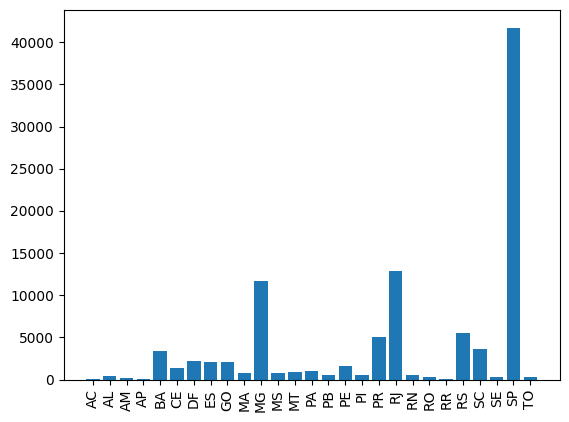

In [18]:
plt.bar(df["customer_state"],df["customer_id"])
plt.xticks(rotation=90)

Calculate the no. of orders per month in 2018?

In [19]:
query1 = pd.read_sql("""
    SELECT strftime('%m', order_purchase_timestamp) AS month,
           COUNT(order_id) AS orders
    FROM orders
    WHERE strftime('%Y', order_purchase_timestamp) = '2018'
    GROUP BY month
    ORDER BY month
""", conn)


In [20]:
print(query1)

  month  orders
0    01    7269
1    02    6728
2    03    7211
3    04    6939
4    05    6873
5    06    6167
6    07    6292
7    08    6512
8    09      16
9    10       4


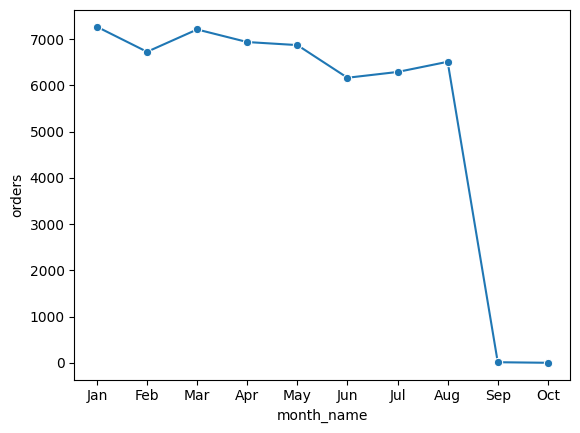

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Convert month numbers to names
query1["month"] = query1["month"].astype(int)  # convert from string to int
query1['month_name'] = query1['month'].apply(lambda x: calendar.month_abbr[x])  # Jan, Feb, ...

# Plot with month names
sns.lineplot(data=query1, x='month_name', y='orders', marker='o')
plt.show()


Find the average number of products per order, grouped by customer city?

In [22]:
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)


          name
0    customers
1  geolocation
2       orders
3  order_items
4     payments
5     products
6      sellers


In [23]:
query2 = pd.read_sql("""
with count_per_order as (
    select o.order_id,
           o.customer_id,
           count(oi.order_id) as oc
    from orders o
    join order_items oi on o.order_id = oi.order_id
    group by o.order_id, o.customer_id
)
select c.customer_city,
       avg(count_per_order.oc) as avg_items_per_order
from customers c
join count_per_order on c.customer_id = count_per_order.customer_id
group by c.customer_city
order by avg_items_per_order desc
""", conn)


In [24]:
print(query2)

            customer_city  avg_items_per_order
0          padre carvalho                  7.0
1             celso ramos                  6.5
2                   datas                  6.0
3           candido godoi                  6.0
4          matias olimpio                  5.0
...                   ...                  ...
4105               abaira                  1.0
4106              abaiara                  1.0
4107               abaete                  1.0
4108            abadiania                  1.0
4109  abadia dos dourados                  1.0

[4110 rows x 2 columns]


Calculate the percentage of total revenue contributed by each product category?

In [25]:
df = pd.read_sql("""
    SELECT 
        UPPER(p."product category") AS category,
        ROUND(SUM(pa.payment_value) * 100.0 / (SELECT SUM(payment_value) FROM payments), 2) AS sales_percentage
    FROM products p
    JOIN order_items oi ON p.product_id = oi.product_id
    JOIN payments pa ON oi.order_id = pa.order_id
    GROUP BY category
""", conn)

df2 = pd.DataFrame(df)
df2


,category,sales_percentage
0,None,1.58
1,AGRO INDUSTRIA E COMERCIO,0.74
2,ART,0.19
3,ARTS AND CRAFTS,0.01
4,AUDIO,0.38
...,...,...
69,STATIONARY STORE,1.98
70,TECHNICAL BOOKS,0.16
71,TELEPHONY,3.04
72,TOYS,3.87


Identify the correlation between product price and the number of times a product has been purchased?

In [26]:
query4 = pd.read_sql(""" select p."product category" as category, count(oi.product_id) as order_count, avg(oi.price) as price 
from products p
join order_items oi on p.product_id = oi.product_id
group by category""", conn)

In [27]:

df = pd.DataFrame(query4)
df


,category,order_count,price
0,None,1603,111.999551
1,Agro Industria e Comercio,212,342.124858
2,Art,209,115.802105
3,Arts and Crafts,24,75.583750
4,Bags Accessories,1092,128.598883
...,...,...,...
69,sport leisure,8641,114.344285
70,stationary store,2517,91.753369
71,technical books,267,71.520824
72,telephony,4545,71.213978


In [28]:
arr1 = df['order_count']
arr2 = df['price']

a = np.corrcoef(arr1, arr2)
print("The correlation coefficient matrix:\n", a)

The correlation coefficient matrix:
 [[ 1.         -0.10631552]
 [-0.10631552  1.        ]]


Calculate the total revenue generated by each seller and rank them by revenue?

In [29]:
query5 = pd.read_sql("""
    select *, 
           dense_rank() over (order by revenue desc) as rank 
    from (
        select oi.seller_id, sum(p.payment_value) as revenue 
        from order_items oi 
        join payments p 
        on oi.order_id = p.order_id
        group by oi.seller_id
    ) t
""", conn)
df3 = pd.DataFrame(query5)



In [30]:
 a = df3.head()
 print(a)

                          seller_id    revenue  rank
0  7c67e1448b00f6e969d365cea6b010ab  507166.91     1
1  1025f0e2d44d7041d6cf58b6550e0bfa  308222.04     2
2  4a3ca9315b744ce9f8e9374361493884  301245.27     3
3  1f50f920176fa81dab994f9023523100  290253.42     4
4  53243585a1d6dc2643021fd1853d8905  284903.08     5


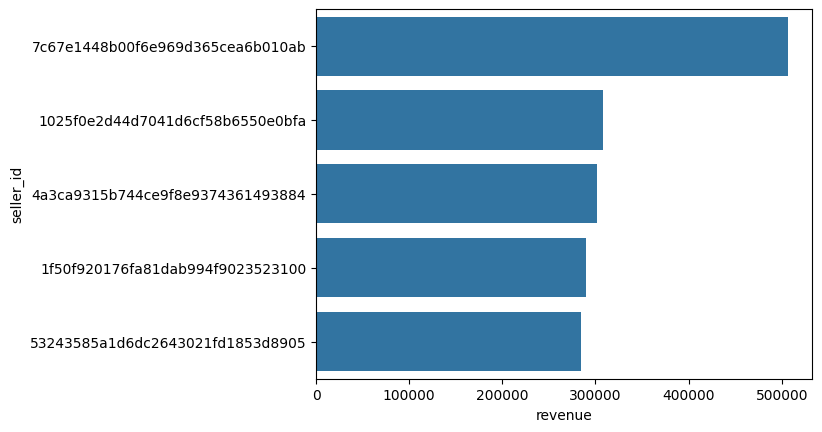

In [31]:
sns.barplot(data=a, y='seller_id', x='revenue')
plt.show()




Calculate the moving average of order values for each customer over their order history? 

In [32]:
query = """
SELECT 
    o.customer_id,
    o.order_purchase_timestamp,
    p.payment_value
FROM orders o
JOIN payments p ON o.order_id = p.order_id
"""
df = pd.read_sql(query, conn)

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df = df.sort_values(['customer_id', 'order_purchase_timestamp'])

df['moving_avg'] = df.groupby('customer_id')['payment_value'].transform(lambda x: x.rolling(3, min_periods=1).mean())
df

,customer_id,order_purchase_timestamp,payment_value,moving_avg
71587,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
10466,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.41
68795,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.42
45159,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.35
6119,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.01
...,...,...,...,...
15766,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.12
98782,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.13
45235,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.13
77168,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.50


Calculate the cummulative sales per month for each year?

In [33]:
query6 = pd.read_sql("""
    SELECT year,
           month,
           sales,
           SUM(sales) OVER (PARTITION BY year ORDER BY month) AS cumulative_sales
    FROM (
        SELECT strftime('%Y', o.order_purchase_timestamp) AS year,
               strftime('%m', o.order_purchase_timestamp) AS month,
               SUM(p.payment_value) AS sales
        FROM orders o
        JOIN payments p ON o.order_id = p.order_id
        GROUP BY year, month
        ORDER BY year, month
    )
""", conn)


In [34]:
df4 = pd.DataFrame(query6)
df4

,year,month,sales,cumulative_sales
0,2016,09,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,01,138488.04,138488.04
4,2017,02,291908.01,430396.05
5,2017,03,449863.60,880259.65
6,2017,04,417788.03,1298047.68
7,2017,05,592918.82,1890966.50
8,2017,06,511276.38,2402242.88
9,2017,07,592382.92,2994625.80


Calculate the year-over-year growth rate of total sales?

In [35]:
df7 = pd.read_sql(""" with a as (
    SELECT strftime('%Y', o.order_purchase_timestamp) AS year,
           SUM(p.payment_value) AS payment
    FROM orders o
    JOIN payments p on o.order_id = p.order_id
    GROUP BY year
    ORDER BY year
) 
select year,
       ((payment - lag(payment,1) over (order by year)) / lag(payment,1) over(order by year)) * 100 as yoy_growth
from a;""", conn)

print(df7)


   year    yoy_growth
0  2016           NaN
1  2017  12112.703761
2  2018     20.000924


Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their purchase?

In [ ]:
query7 = pd.read_sql("""
with a as (
    select c.customer_id,
           min(o.order_purchase_timestamp) as first_order
    from customers c
    join orders o on c.customer_id = o.customer_id
    group by c.customer_id
), 
b as (
    select a.customer_id,
           count(distinct o.order_purchase_timestamp) as next_order
    from a
    join orders o on a.customer_id = o.customer_id
    where o.order_purchase_timestamp > first_order
      and o.order_purchase_timestamp < date(first_order, '+6 months')
    group by a.customer_id
)
select 100.0 * count(distinct b.customer_id) / count(distinct a.customer_id) as percent_customers
from a
left join b on a.customer_id = b.customer_id
""", conn)

# Extract the single value from the result
value = query7.iloc[0, 0]

# Only print 0 or None
if value is None:
    print(None)
else:
    print(0)



0


Identify the top 3 customers who spent the most money in each year?

In [ ]:
query8 = pd.read_sql(""" select order_year , customer_id, payment,d_rank from
(select 
    strftime('%Y', o.order_purchase_timestamp) as order_year,
    o.customer_id,
    sum(p.payment_value) as payment,
    dense_rank() over(partition by strftime('%Y', o.order_purchase_timestamp)
                      order by sum(p.payment_value) desc) as d_rank
from orders o 
join payments p on o.order_id = p.order_id
group by order_year, o.customer_id) as a 
where d_rank <= 3
""", conn)
print(query8)



  order_year                       customer_id   payment  d_rank
0       2016  a9dc96b027d1252bbac0a9b72d837fc6   1423.55       1
1       2016  1d34ed25963d5aae4cf3d7f3a4cda173   1400.74       2
2       2016  4a06381959b6670756de02e07b83815f   1227.78       3
3       2017  1617b1357756262bfa56ab541c47bc16  13664.08       1
4       2017  c6e2731c5b391845f6800c97401a43a9   6929.31       2
5       2017  3fd6777bbce08a352fddd04e4a7cc8f6   6726.66       3
6       2018  ec5b2ba62e574342386871631fafd3fc   7274.88       1
7       2018  f48d464a0baaea338cb25f816991ab1f   6922.21       2
8       2018  e0a2412720e9ea4f26c1ac985f6a7358   4809.44       3


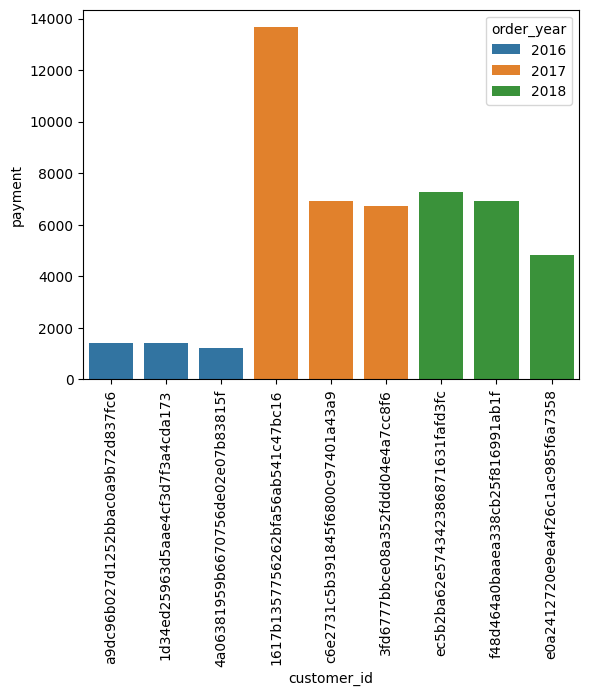

In [49]:
sns.barplot(x="customer_id", y="payment", data=query8, hue="order_year")
plt.xticks(rotation=90)   # <-- fixed here
plt.show()
